Tesla is an American multinational automotive and clean energy company headquartered in Austin, Texas, founded by Elon Mask.

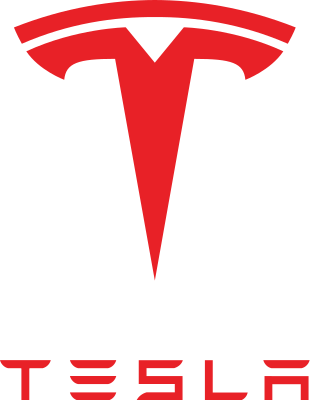

Import libraries

In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch.nn as nn

import random
import torch

def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

set_random_seed(42)

In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 935.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 10.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=727805 sha256=368257f358d32efc44813ef326fb51294f82042fbb729f17b3ae156b4ff04c27
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


Import yfinance

In [3]:
# To fetch financial data
import yfinance as yf

Choose the periods and check the data

In [4]:
period = '10y'
interval = '1d'

In [5]:
forex_data = yf.download('TSLA', period=period, interval=interval)

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,183.800003,187.559998,182.199997,184.759995,184.759995,84390300
2024-05-07,182.399994,183.259995,177.399994,177.809998,177.809998,75045900
2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500
2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65701300
2024-05-10,173.009995,173.059906,167.750000,168.660004,168.660004,52162965


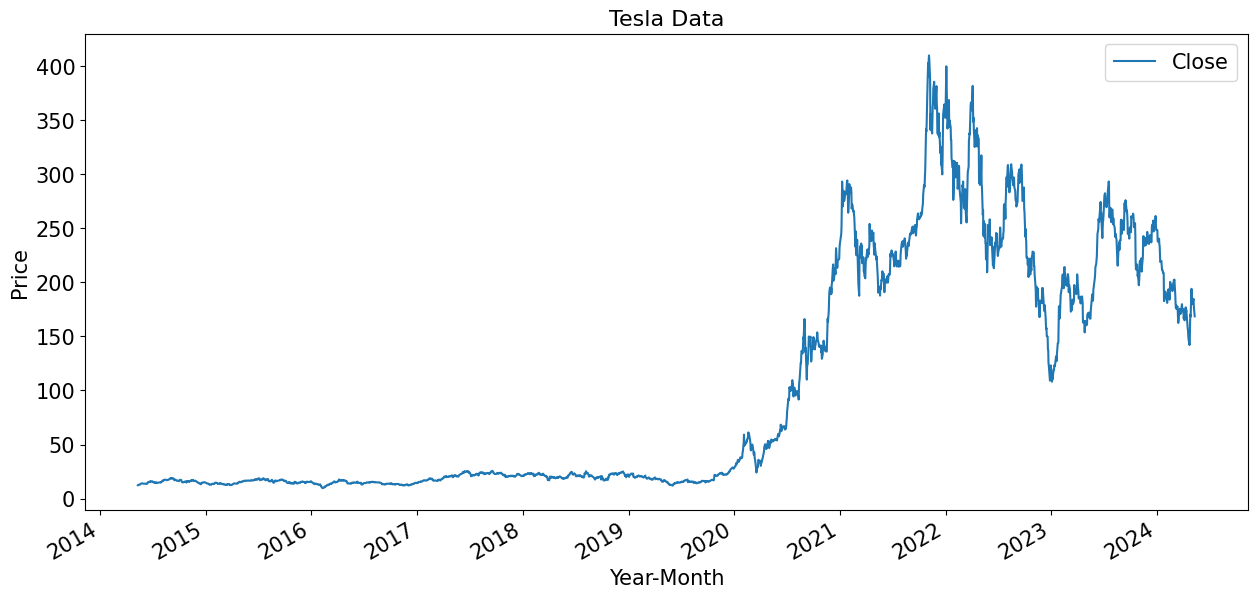

In [14]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data['Close'].plot()

# Set the title and axis label
plt.title('Tesla Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.show()

In [7]:
forex_data_1 = yf.download('YM=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_1.index = pd.to_datetime(forex_data_1.index)

# Display the last five rows
forex_data_1.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,38920.0,39028.0,38834.0,38997.0,38997.0,77489
2024-05-07,38985.0,39127.0,38976.0,39027.0,39027.0,79867
2024-05-08,39016.0,39236.0,38936.0,39195.0,39195.0,91392
2024-05-09,39198.0,39592.0,39086.0,39536.0,39536.0,91392
2024-05-10,39562.0,39718.0,39531.0,39626.0,39626.0,71398


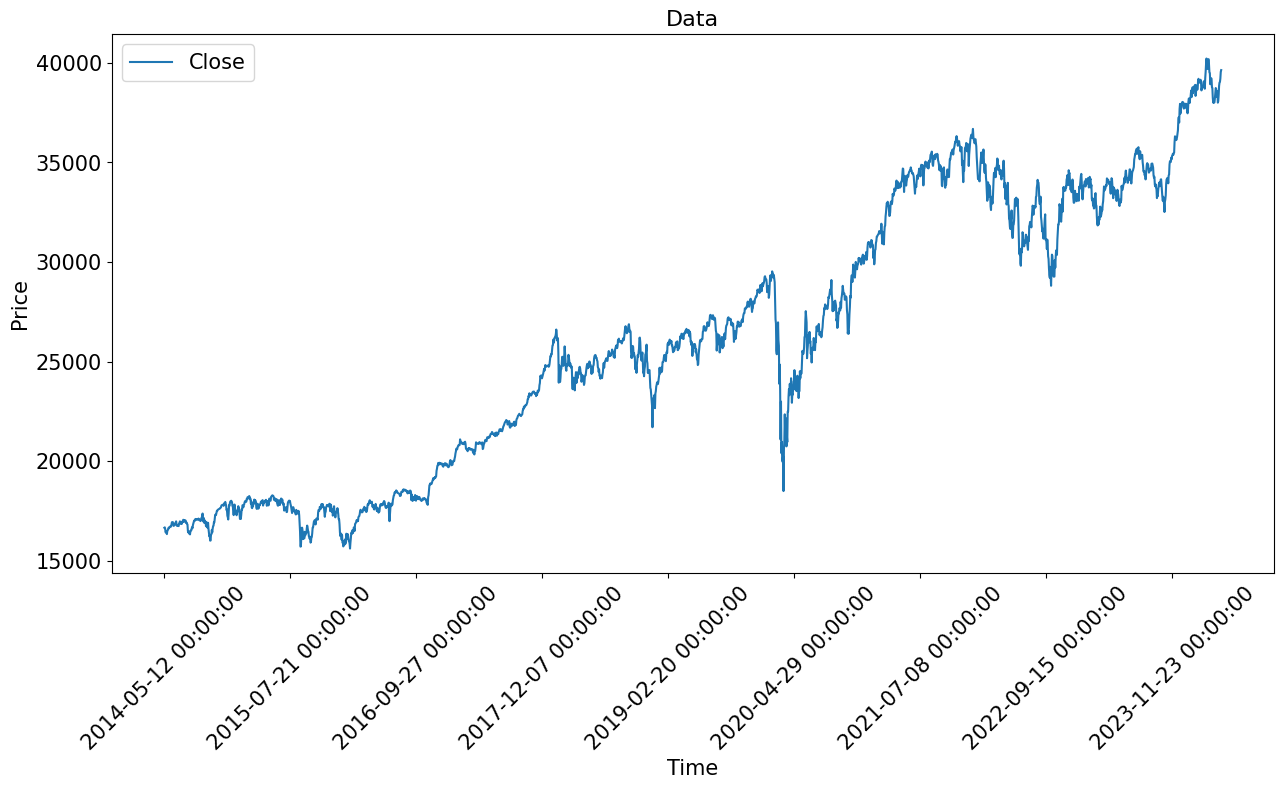

In [8]:
# Transform index type from datetime to string
forex_data_1['dates'] = forex_data_1.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_1['dates'], forex_data_1['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [9]:
forex_data_2 = yf.download('ES=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_2.index = pd.to_datetime(forex_data_2.index)

# Display the last five rows
forex_data_2.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,5166.75,5207.75,5155.75,5206.50,5206.50,1019307
2024-05-07,5204.75,5226.75,5202.25,5213.75,5213.75,1106457
2024-05-08,5211.75,5218.00,5188.75,5212.75,5212.75,1013418
2024-05-09,5209.25,5244.75,5195.00,5239.00,5239.00,1013418
2024-05-10,5240.75,5264.00,5232.75,5243.00,5243.00,725740


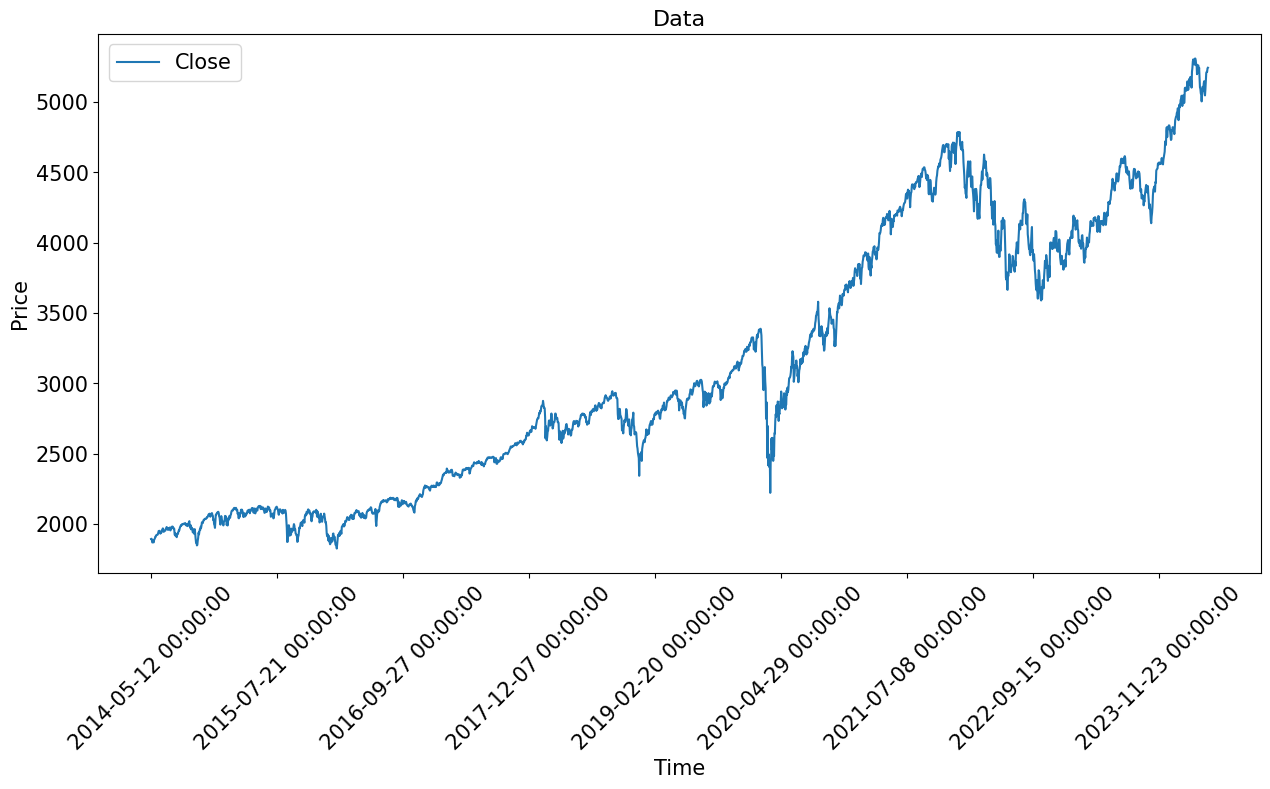

In [10]:
# Transform index type from datetime to string
forex_data_2['dates'] = forex_data_2.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_2['dates'], forex_data_2['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [11]:
forex_data_3 = yf.download('NQ=F', period=period, interval=interval)

# Set the index to a datetime object
forex_data_3.index = pd.to_datetime(forex_data_3.index)

# Display the last five rows
forex_data_3.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,18047.50,18201.25,17983.75,18195.50,18195.50,395489
2024-05-07,18189.50,18266.25,18151.00,18199.50,18199.50,469722
2024-05-08,18194.00,18242.25,18072.50,18186.50,18186.50,453714
2024-05-09,18160.75,18240.25,18103.75,18214.50,18214.50,453714
2024-05-10,18226.00,18348.00,18188.50,18244.25,18244.25,345499


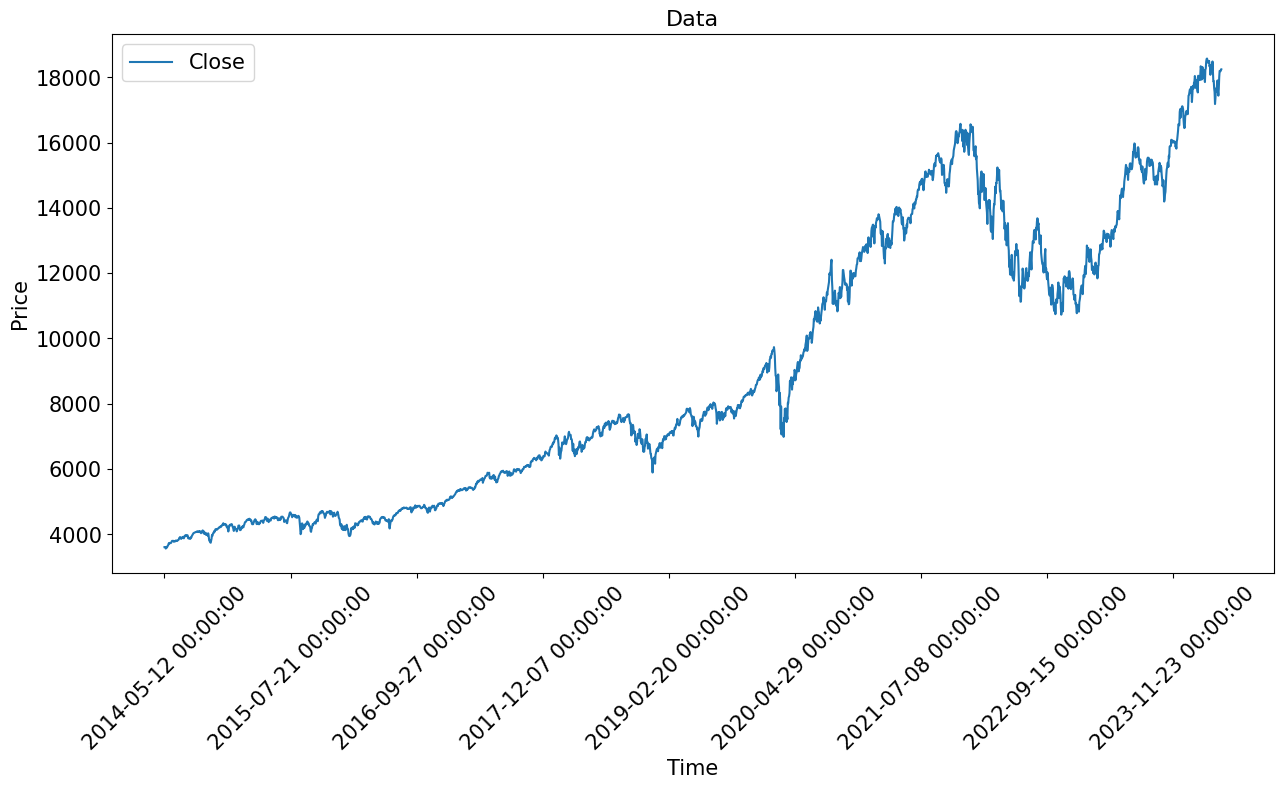

In [12]:
# Transform index type from datetime to string
forex_data_3['dates'] = forex_data_3.index.strftime(
    '%Y-%m-%d %H:%M:%S')

# Plot the series
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(forex_data_3['dates'], forex_data_3['Close'])

# Set title and axis label
plt.title('Data', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Set maximum number of tick locators
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [13]:
def display(data, pred = None, vert = None, title = 'Prediction'):
  data = np.array(data).reshape((len(data), 1))
  plt.figure(figsize=(12, 6))
  plt.plot(data, label='Some periodic function')
  if pred != None:
    plt.plot(pred, label=title)
  if vert != None:
    plt.axvline(x=vert, c='r', linestyle='--')
  plt.legend()
  plt.grid()
  plt.show()

In [15]:
df1 = forex_data[['Close']].rename(columns={'Close': 'Tesla'})
df2 = forex_data_1[['Close']].rename(columns={'Close': 'Dow Jones'})
df3 = forex_data_2[['Close']].rename(columns={'Close': 'S&P'})
df4 = forex_data_3[['Close']].rename(columns={'Close': 'Nasdaq'})
df = pd.merge(df1,df2, how='inner', left_index=True, right_index=True)
df = pd.merge(df,df3, how='inner', left_index=True, right_index=True)
df = pd.merge(df,df4, how='inner', left_index=True, right_index=True)
df

,Tesla,Dow Jones,S&P,Nasdaq
Date,,,,
2014-05-12,12.311333,16655.0,1892.75,3607.75
2014-05-13,12.677333,16675.0,1894.25,3608.75
2014-05-14,12.708000,16587.0,1885.25,3596.25
2014-05-15,12.572667,16421.0,1867.25,3563.25
2014-05-16,12.770667,16465.0,1874.75,3582.75
...,...,...,...,...
2024-05-06,184.759995,38997.0,5206.50,18195.50
2024-05-07,177.809998,39027.0,5213.75,18199.50
2024-05-08,174.720001,39195.0,5212.75,18186.50


In [16]:
train_size = int(len(df)-20)

train_data = df[:train_size].to_numpy()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
train_df = scaler1.fit_transform(train_data)


In [18]:
input_size = 4
hidden_size = 40
num_classes = 4


In [19]:
set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

# create data "ensemble"
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)] # picking several sequential observations
        _y = data[i+seq_length] # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))

# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length =  40 # compare 2 and 32
x, y = sliding_windows(train_df, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])


x_train = x
y_train = y




# Define new LSTM based model
class LSTMPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//2, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//4, batch_first=True, dropout=0.2)
        self.lstm4 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//8, batch_first=True, dropout=0.2)
        self.fc_1 = nn.Linear(4*hidden_size, 64) # fully connected
        self.fc_11 = nn.Linear(64, 64)
        self.a = hidden_size + hidden_size//2 + hidden_size//4 + hidden_size//8
        self.fc_2 = nn.Linear(self.a, 1) # fully connected
        self.fc_3 = nn.Linear(self.a, 1) # fully connected
        self.fc_4 = nn.Linear(self.a, 1) # fully connected
        self.fc_5 = nn.Linear(self.a, 1) # fully connected
        self.relu = nn.Tanh()
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        out, (h1, c) = self.lstm1(x)
        out, (h2, c) = self.lstm2(x)
        out, (h3, c) = self.lstm3(x)
        out, (h4, c) = self.lstm4(x)

        out1 = torch.cat((h1, h2, h3, h4), 2)
        #out1 = self.drop(self.fc_11(self.drop(self.fc_1(self.relu(out)))))
        out2 = self.fc_2(self.relu(out1))
        out3 = self.fc_3(self.relu(out1))
        out4 = self.fc_4(self.relu(out1))
        out5 = self.fc_5(self.relu(out1))

        return torch.cat((out2, out3, out4, out5), 2)

lstm =  LSTMPredictor(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)


lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 4000
learning_rate = 0.001

criterion = torch.nn.L1Loss() # mean-squared error for regression
optimizer = torch.optim.AdamW(lstm.parameters(), lr=learning_rate)

 # Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    #print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 500 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.0068, 0.0424, 0.0196, 0.0030],
        [0.0077, 0.0432, 0.0200, 0.0030],
        [0.0078, 0.0396, 0.0174, 0.0022],
        [0.0075, 0.0329, 0.0123, 0.0000],
        [0.0080, 0.0347, 0.0144, 0.0013],
        [0.0087, 0.0353, 0.0166, 0.0033],
        [0.0086, 0.0295, 0.0125, 0.0022],
        [0.0093, 0.0361, 0.0174, 0.0047],
        [0.0102, 0.0372, 0.0189, 0.0056],
        [0.0106, 0.0396, 0.0208, 0.0074],
        [0.0113, 0.0424, 0.0243, 0.0105],
        [0.0111, 0.0413, 0.0243, 0.0102],
        [0.0111, 0.0435, 0.0268, 0.0115],
        [0.0107, 0.0444, 0.0278, 0.0115],
        [0.0102, 0.0451, 0.0279, 0.0109],
        [0.0102, 0.0448, 0.0280, 0.0112],
        [0.0100, 0.0450, 0.0291, 0.0120],
        [0.0105, 0.0490, 0.0327, 0.0142],
        [0.0107, 0.0537, 0.0358, 0.0156],
        [0.0103, 0.0538, 0.0361, 0.0154],
        [0.0098, 0.0541, 0.0362, 0.0158],
        [0.0101, 0.0505, 0.0343, 0.0157],
        [0

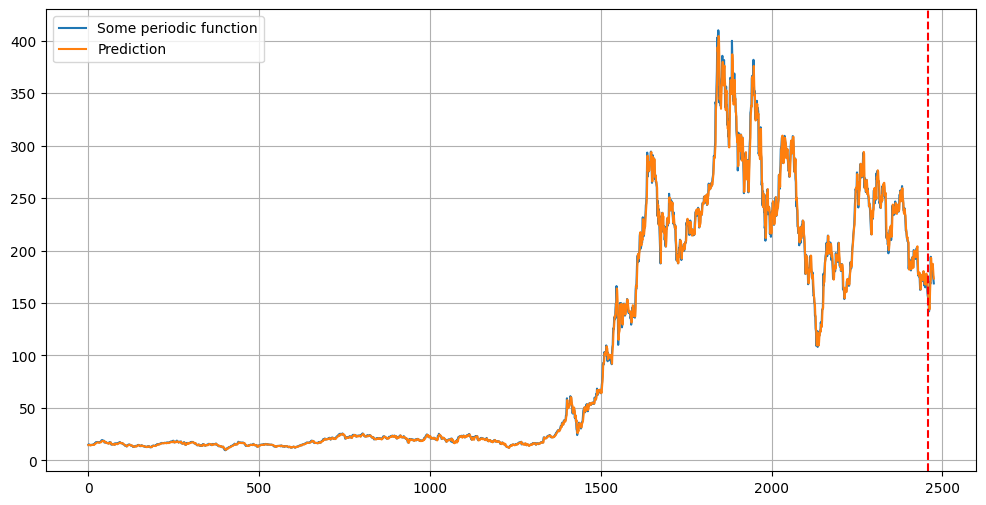

In [20]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,0], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,0]), vert=train_size-seq_length+1)

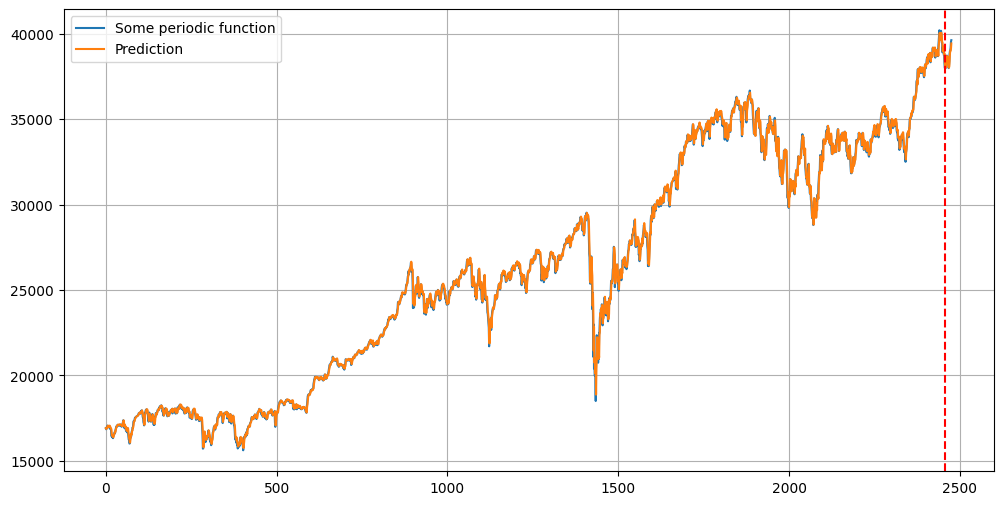

In [21]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,1], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,1]), vert=train_size-seq_length+1)

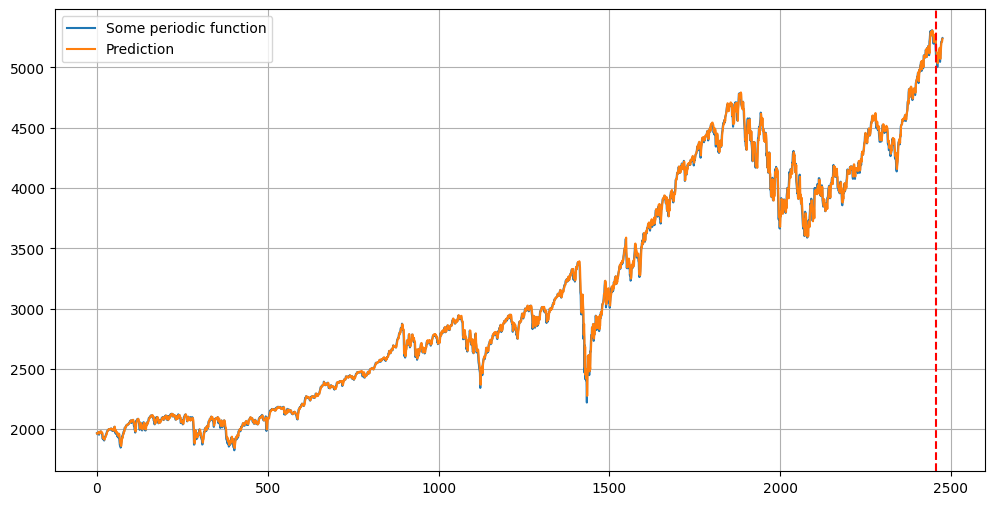

In [22]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,2], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,2]), vert=train_size-seq_length+1)

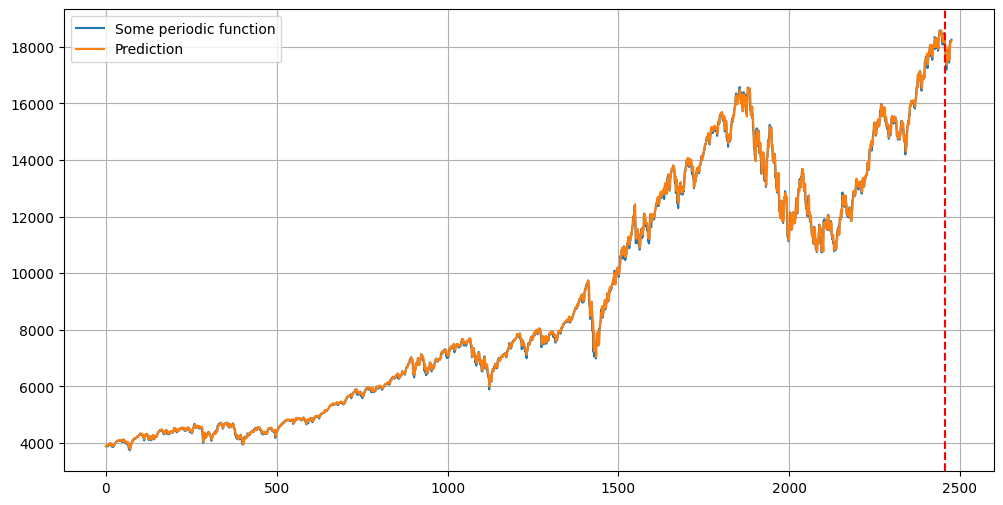

In [23]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,3], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,3]), vert=train_size-seq_length+1)

In [24]:
data_pred = scaler1.transform(df[:train_size].to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[0.00682664, 0.04240872, 0.01958955, 0.00296439],
       [0.00774075, 0.04322192, 0.02002009, 0.00303101],
       [0.00781734, 0.03964382, 0.01743685, 0.00219831],
       ...,
       [0.44709232, 0.93948638, 0.9814285 , 0.98044842],
       [0.45886976, 0.95780528, 0.99861747, 0.9940868 ],
       [0.45118141, 0.94086361, 0.98248756, 0.98028022]])

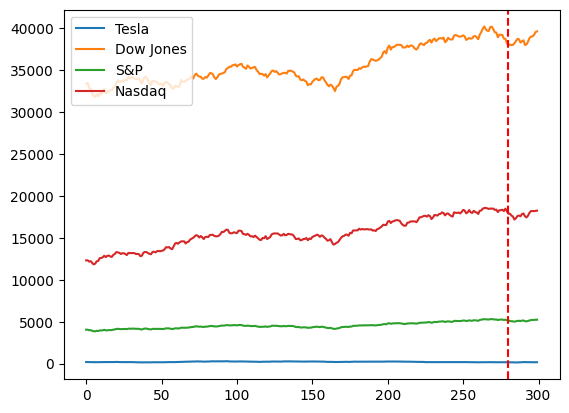

In [25]:
plt.plot(df.to_numpy()[-300:])
plt.legend(['Tesla','Dow Jones','S&P','Nasdaq'], loc=2)
plt.axvline(x=300-20, c='r', linestyle='--')

Predicted plot

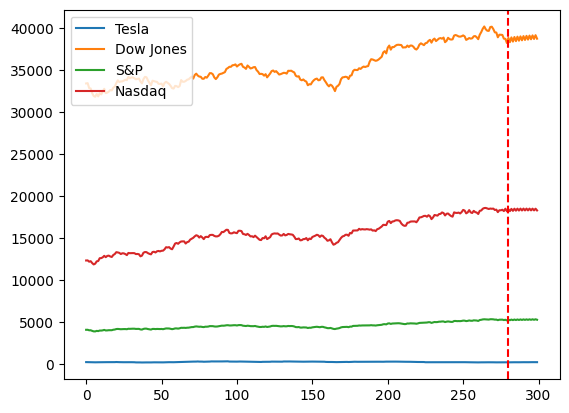

In [26]:
plt.plot(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-300:])
plt.legend(['Tesla','Dow Jones','S&P','Nasdaq'], loc=2)
plt.axvline(x=300-20, c='r', linestyle='--')

In [27]:
train_size = int(len(df))

train_data = df[:train_size].to_numpy()
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
train_df = scaler1.fit_transform(train_data)


set_random_seed(42)
import warnings
warnings.filterwarnings('ignore')

# create data "ensemble"
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)] # picking several sequential observations
        _y = data[i+seq_length] # picking the subsequent observation
        x.append(_x)
        y.append(_y)

    return torch.Tensor(np.array(x)), torch.Tensor(np.array(y))

# set length of the ensemble; accuracy of the predictions and
# speed perfomance almost always depend on it size
seq_length = 40 # compare 2 and 32
x, y = sliding_windows(train_df, seq_length)
print("Example of the obtained data:\n")
print("Data corresponding to the first x:")
print(x[0])
print("Data corresponding to the first y:")
print(y[0])


x_train = x
y_train = y




# Define new LSTM based model
class LSTMPredictor(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        # hidden_size == number of neurons
        super().__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//2, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//4, batch_first=True, dropout=0.2)
        self.lstm4 = nn.LSTM(input_size=input_size, hidden_size=hidden_size//8, batch_first=True, dropout=0.2)
        self.fc_1 = nn.Linear(4*hidden_size, 64) # fully connected
        self.fc_11 = nn.Linear(64, 64)
        self.a = hidden_size + hidden_size//2 + hidden_size//4 + hidden_size//8
        self.fc_2 = nn.Linear(self.a, 1) # fully connected
        self.fc_3 = nn.Linear(self.a, 1) # fully connected
        self.fc_4 = nn.Linear(self.a, 1) # fully connected
        self.fc_5 = nn.Linear(self.a, 1) # fully connected
        self.relu = nn.Tanh()
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        out, (h1, c) = self.lstm1(x)
        out, (h2, c) = self.lstm2(x)
        out, (h3, c) = self.lstm3(x)
        out, (h4, c) = self.lstm4(x)

        out1 = torch.cat((h1, h2, h3, h4), 2)
        #out1 = self.drop(self.fc_11(self.drop(self.fc_1(self.relu(out)))))
        out2 = self.fc_2(self.relu(out1))
        out3 = self.fc_3(self.relu(out1))
        out4 = self.fc_4(self.relu(out1))
        out5 = self.fc_5(self.relu(out1))

        return torch.cat((out2, out3, out4, out5), 2)

lstm =  LSTMPredictor(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

lstm.train()

print("LSTM training process with MSE loss:")

num_epochs = 4000
learning_rate = 0.001

criterion = torch.nn.L1Loss() # mean-squared error for regression
optimizer = torch.optim.AdamW(lstm.parameters(), lr=learning_rate)

 # Train the model
for epoch in range(num_epochs):
    y_pred = lstm(x_train)
    optimizer.zero_grad()
    #print(outputs.shape)
    loss = criterion(y_pred, y_train.unsqueeze(0))
    loss.backward()

    optimizer.step()
    if epoch % 500 == 0:
        print(f"Epoch: {epoch},".ljust(15), "loss: %1.5f" % (loss.item()))

Example of the obtained data:

Data corresponding to the first x:
tensor([[0.0068, 0.0424, 0.0196, 0.0030],
        [0.0077, 0.0432, 0.0200, 0.0030],
        [0.0078, 0.0396, 0.0174, 0.0022],
        [0.0075, 0.0329, 0.0123, 0.0000],
        [0.0080, 0.0347, 0.0144, 0.0013],
        [0.0087, 0.0353, 0.0166, 0.0033],
        [0.0086, 0.0295, 0.0125, 0.0022],
        [0.0093, 0.0361, 0.0174, 0.0047],
        [0.0102, 0.0372, 0.0189, 0.0056],
        [0.0106, 0.0396, 0.0208, 0.0074],
        [0.0113, 0.0424, 0.0243, 0.0105],
        [0.0111, 0.0413, 0.0243, 0.0102],
        [0.0111, 0.0435, 0.0268, 0.0115],
        [0.0107, 0.0444, 0.0278, 0.0115],
        [0.0102, 0.0451, 0.0279, 0.0109],
        [0.0102, 0.0448, 0.0280, 0.0112],
        [0.0100, 0.0450, 0.0291, 0.0120],
        [0.0105, 0.0490, 0.0327, 0.0142],
        [0.0107, 0.0537, 0.0358, 0.0156],
        [0.0103, 0.0538, 0.0361, 0.0154],
        [0.0098, 0.0541, 0.0362, 0.0158],
        [0.0101, 0.0505, 0.0343, 0.0157],
        [0

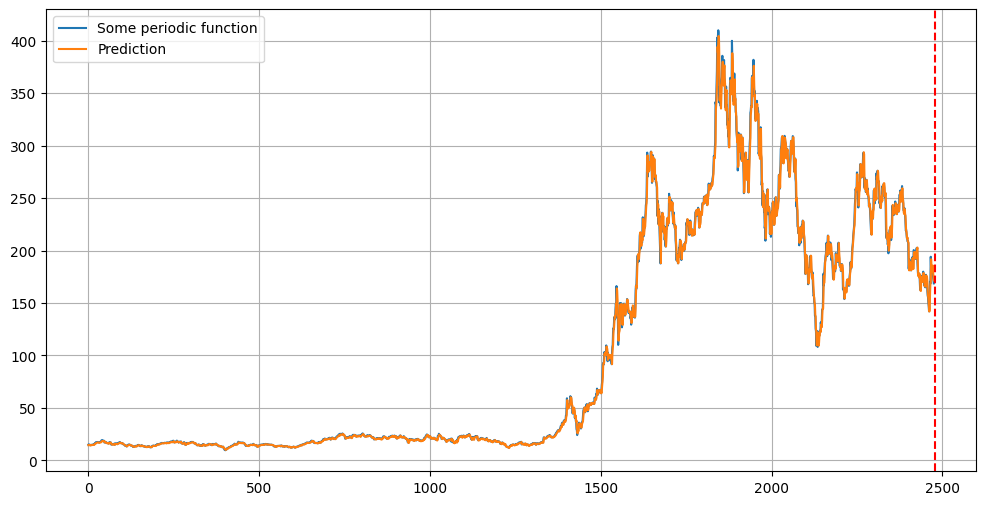

In [28]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,0], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,0]), vert=train_size-seq_length+1)

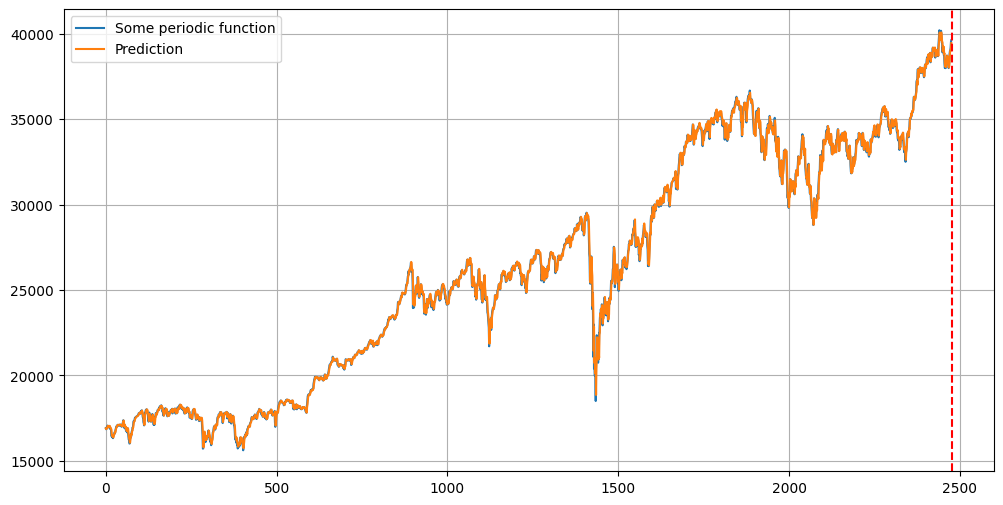

In [29]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,1], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,1]), vert=train_size-seq_length+1)

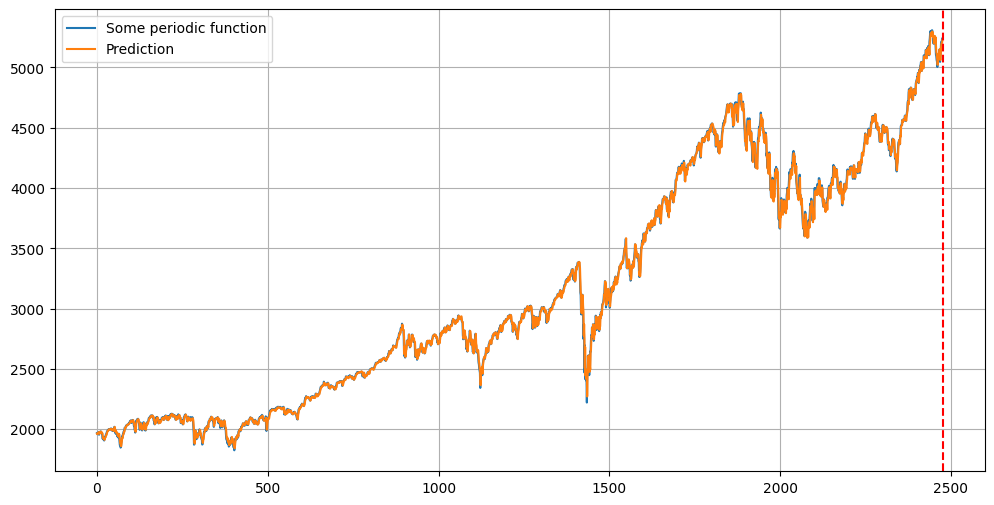

In [30]:
x_s, y_s = sliding_windows(scaler1.transform(df.to_numpy().reshape(-1,num_classes)), seq_length)

lstm.eval()

train_predict = lstm(x_s)
display(data=df[seq_length:len(df)].to_numpy().reshape(-1,num_classes)[:,2], pred=list(scaler1.inverse_transform(train_predict.detach().numpy().reshape(-1,num_classes)).reshape(-1,num_classes)[:,2]), vert=train_size-seq_length+1)

In [31]:
data_pred = scaler1.transform(df[:-20].to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[0.00682664, 0.04240872, 0.01958955, 0.00296439],
       [0.00774075, 0.04322192, 0.02002009, 0.00303101],
       [0.00781734, 0.03964382, 0.01743685, 0.00219831],
       ...,
       [0.39876819, 0.93608248, 0.96413618, 0.97557342],
       [0.41183877, 0.96336204, 0.98966587, 0.99605584],
       [0.39780539, 0.93691963, 0.96416306, 0.97563803]])

In [32]:
df[-20:]

,Tesla,Dow Jones,S&P,Nasdaq
Date,,,,
2024-04-15,161.479996,37993.0,5104.00,17876.25
2024-04-16,157.110001,38046.0,5092.50,17881.25
2024-04-17,155.449997,37990.0,5062.25,17658.50
2024-04-18,149.929993,38007.0,5049.00,17547.25
2024-04-19,147.050003,38208.0,5003.75,17180.75
2024-04-22,142.050003,38468.0,5047.50,17350.00
2024-04-23,144.679993,38726.0,5106.50,17606.75
2024-04-24,162.130005,38680.0,5107.50,17664.50
2024-04-25,170.179993,38288.0,5082.25,17567.50


In [33]:
pd.DataFrame(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-(20):-1])

,0,1,2,3
0,174.978243,38856.203021,5250.379396,18418.413016
1,170.925069,38334.162255,5178.329202,18186.658017
2,175.155466,38932.866063,5254.992828,18451.032209
3,170.973134,38398.839963,5180.941390,18203.612732
4,175.354073,39000.811299,5258.394964,18469.016787
5,170.917909,38449.491780,5182.174906,18208.603676
6,175.416480,39056.696439,5260.902282,18477.649384
7,170.756294,38490.489071,5182.746808,18208.993789
8,175.380181,39106.028931,5262.997390,18483.719403
9,170.527999,38525.908548,5183.039820,18208.324513


In [34]:
data_pred = scaler1.transform(df.to_numpy().reshape(-1,num_classes))

x_s, y_s = sliding_windows(data_pred, seq_length)
for i in range(20):
    data_pred = np.append(data_pred, (lstm(x_s).detach().numpy()[0][-1]).reshape(-1,num_classes),  axis=0)
    x_s, y_s = sliding_windows(data_pred, seq_length)
data_pred

array([[0.00682664, 0.04240872, 0.01958955, 0.00296439],
       [0.00774075, 0.04322192, 0.02002009, 0.00303101],
       [0.00781734, 0.03964382, 0.01743685, 0.00219831],
       ...,
       [0.38399756, 0.96475524, 0.97955871, 0.98193312],
       [0.38259262, 0.96196258, 0.97744888, 0.98063409],
       [0.38275212, 0.96438926, 0.98010027, 0.9829334 ]])

In [35]:
pd.DataFrame(scaler1.inverse_transform(data_pred.reshape(-1,num_classes))[-(20):-1])

,0,1,2,3
0,171.514898,39455.330478,5228.914977,18217.166483
1,168.070908,39542.537859,5232.992224,18224.065045
2,169.792616,39413.116477,5222.888816,18205.361084
3,167.347028,39485.021154,5230.126688,18210.665192
4,168.379867,39376.175378,5221.140090,18198.659368
5,166.668277,39445.494178,5229.274233,18215.364446
6,167.232451,39351.718025,5221.173939,18204.385801
7,166.052125,39417.789819,5229.694127,18227.585011
8,166.265480,39333.147793,5222.057750,18215.301813
9,165.470529,39396.138231,5230.757982,18242.278680


In [36]:
df_pred = scaler1.inverse_transform(data_pred.reshape(-1,num_classes))
df_pred

array([[1.23113327e+01, 1.66550000e+04, 1.89275000e+03, 3.60775000e+03],
       [1.26773329e+01, 1.66750000e+04, 1.89425000e+03, 3.60875000e+03],
       [1.27080002e+01, 1.65870000e+04, 1.88525000e+03, 3.59625000e+03],
       ...,
       [1.63327551e+02, 3.93391903e+04, 5.23728253e+03, 1.83035390e+04],
       [1.62765024e+02, 3.92705077e+04, 5.22993190e+03, 1.82840387e+04],
       [1.62828888e+02, 3.93301896e+04, 5.23916935e+03, 1.83185548e+04]])

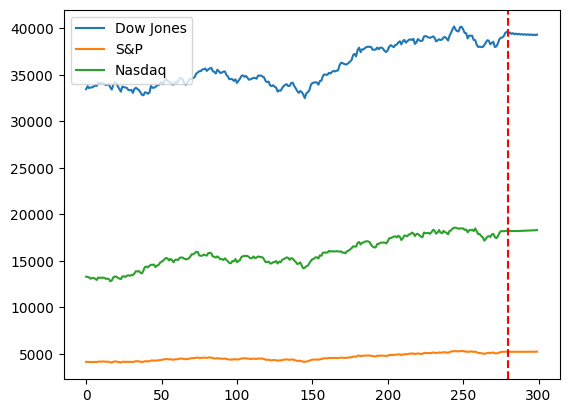

In [37]:
plt.plot(df_pred[-300:,1:4])
plt.legend(['Dow Jones','S&P','Nasdaq'], loc=2)
plt.axvline(x=300-20, c='r', linestyle='--')

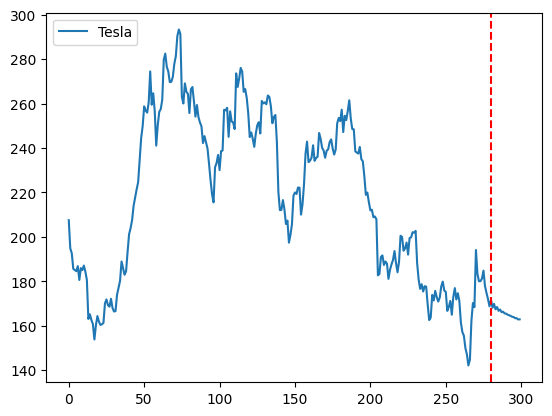

In [38]:
plt.plot(df_pred[-300:,0])
plt.legend(['Tesla'], loc=2)
plt.axvline(x=300-20, c='r', linestyle='--')